# Homework 9: Time Series Analysis

#### Find outliers, trends and periodicity in the MTA turnstile data

In [1]:
# set working environment and imports
import os
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

PUIDATA = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load data and convert to float
mta = np.load(PUIDATA + "/MTA_Fare.npy")
mta = mta.astype(float)

In [3]:
# explore data shape
mta.shape

(600, 23, 194)

In [4]:
# eliminate -1 values, change to nan
mta[mta == -1] = np.nan

In [5]:
# convert to 2D array using reshape function
mta_rshp = mta.reshape(600*23, 194)

### Task 1:
#### Event detection: 
Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


In [6]:
mta_data = pd.DataFrame(mta_rshp)
mta_data.head()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,56961.0,64703.0,68002.0,72628.0,75866.0,72433.0,71186.0,71498.0,73801.0,72517.0,...,43608.0,44774.0,46955.0,39050.0,37384.0,33864.0,38358.0,36527.0,33929.0,36824.0
1,1732.0,2083.0,2107.0,2188.0,2314.0,1921.0,2072.0,1999.0,2031.0,1980.0,...,1425.0,1085.0,965.0,1284.0,1407.0,1085.0,1389.0,1264.0,1172.0,1238.0
2,203.0,276.0,245.0,280.0,265.0,241.0,278.0,236.0,258.0,264.0,...,217.0,189.0,150.0,194.0,183.0,185.0,200.0,186.0,167.0,167.0
3,883.0,958.0,976.0,987.0,1012.0,927.0,898.0,902.0,907.0,907.0,...,576.0,460.0,388.0,517.0,593.0,498.0,538.0,545.0,516.0,489.0
4,358.0,529.0,422.0,261.0,248.0,362.0,479.0,345.0,192.0,414.0,...,290.0,109.0,124.0,349.0,357.0,197.0,220.0,281.0,309.0,245.0


In [7]:
# first sum rides (swipes) minus nans
mta_sum = np.nansum(mta_data, axis = 0)

In [9]:
# create time data
mta_time = pd.date_range(start="05/21/2010", periods = 194, freq="W")

In [10]:
# create dataframe to incorporate time 
df = pd.DataFrame({'sums': mta_sum.T})
df.index = mta_time
df.head()

,sums
2010-05-23,26720267.0
2010-05-30,29265971.0
2010-06-06,29601189.0
2010-06-13,29387592.0
2010-06-20,29185768.0


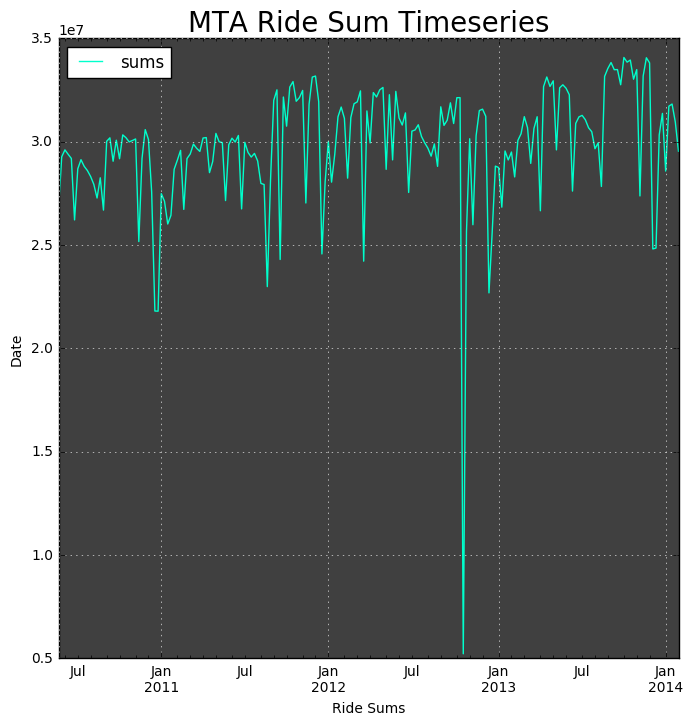

In [48]:
ax = df.plot(figsize = (8,8), color = '#00ffcc')
ax.set_axis_bgcolor("#404040")
pl.ylabel('Date')
pl.xlabel('Ride Sums')
pl.grid(color = '#e6e6e6')
pl.title("MTA Ride Sum Timeseries", fontsize = 20)

#### Plot Caption: 
This plot shows the sum of rides at each station over time. There is a significant drop in the number of rides towards the end of 2012.

In [12]:
# create 3 standard deviation threshold to determine date of event
threshold = 3*df.sums.std()
df[df.sums < threshold]


,sums
2012-10-21,5218686.0


### Task 2:


In [13]:
# group by card type
cardtype = np.nansum(mta, axis = 0)

In [14]:
# check to see 23 types
cardtype.shape

(23, 194)

In [15]:
# put in dataframe
df_card = pd.DataFrame(cardtype)
df_card.head()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,11494615.0,12526859.0,12766627.0,12653675.0,12809694.0,11429783.0,12346877.0,12576759.0,12437115.0,12431257.0,...,14604028.0,11344945.0,11223430.0,12864865.0,12904811.0,11932970.0,13139360.0,13189610.0,12500756.0,12459947.0
1,530524.0,583533.0,586194.0,562602.0,548858.0,455691.0,518187.0,513412.0,512192.0,522569.0,...,781529.0,596341.0,518956.0,664531.0,744990.0,613294.0,713717.0,695134.0,670228.0,679497.0
2,47801.0,51486.0,51636.0,52063.0,51153.0,46852.0,48963.0,49629.0,49030.0,50376.0,...,62658.0,50820.0,45153.0,56129.0,60429.0,51664.0,57208.0,58771.0,56525.0,55192.0
3,186551.0,199229.0,199668.0,196389.0,194883.0,175648.0,188467.0,188090.0,186822.0,190528.0,...,193268.0,164607.0,148652.0,177885.0,193547.0,168932.0,189564.0,184239.0,180029.0,179363.0
4,46808.0,64353.0,56994.0,37429.0,35210.0,46849.0,60225.0,47439.0,32084.0,52171.0,...,56671.0,22623.0,25301.0,67713.0,64867.0,43426.0,47804.0,61101.0,59400.0,46859.0


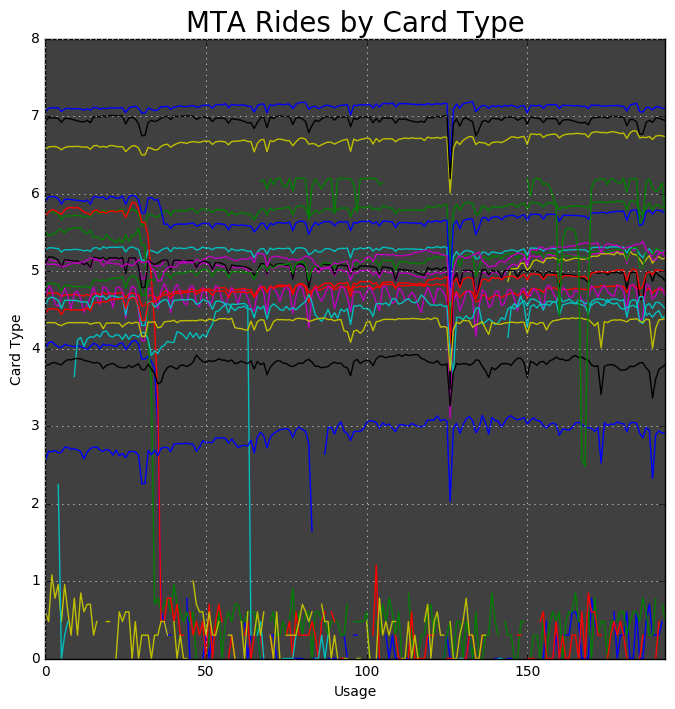

In [52]:
ax = np.log10(df_card).T.plot(legend = False, figsize = (8,8))
ax.set_axis_bgcolor("#404040")
pl.ylabel('Card Type')
pl.xlabel('Usage')
pl.grid(color = '#e6e6e6')
pl.title("MTA Rides by Card Type", fontsize = 20)

#### Plot Caption:
This plot shows the card usage over time for each type of metrocard.

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  app.launch_new_instance()


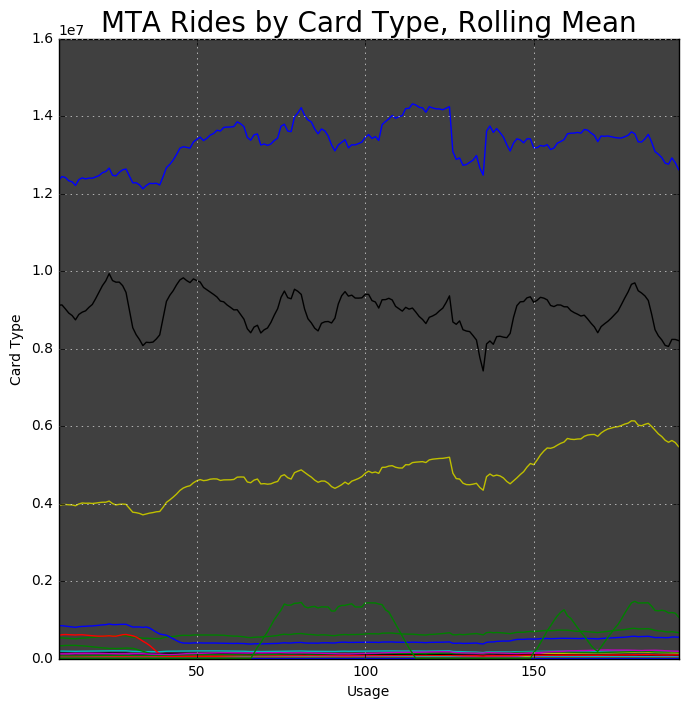

In [53]:
# find rolling means, plot data

ax = pd.rolling_mean(df_card.T, 10).dropna().plot(legend = False, figsize = (8,8))
ax.set_axis_bgcolor("#404040")
pl.ylabel('Card Type')
pl.xlabel('Usage')
pl.grid(color = '#e6e6e6')
pl.title("MTA Rides by Card Type, Rolling Mean", fontsize = 20)

#### Plot Caption:
This plot illustrates card usage over time for each type of metrocard utilizing the rolling means.

In [18]:
cardtype_names = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])


In [19]:
df_card.index = cardtype_names
df_card

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
10t,11494615.0,12526859.0,12766627.0,12653675.0,12809694.0,11429783.0,12346877.0,12576759.0,12437115.0,12431257.0,...,14604028.0,11344945.0,11223430.0,12864865.0,12904811.0,11932970.0,13139360.0,13189610.0,12500756.0,12459947.0
14d,530524.0,583533.0,586194.0,562602.0,548858.0,455691.0,518187.0,513412.0,512192.0,522569.0,...,781529.0,596341.0,518956.0,664531.0,744990.0,613294.0,713717.0,695134.0,670228.0,679497.0
1d,47801.0,51486.0,51636.0,52063.0,51153.0,46852.0,48963.0,49629.0,49030.0,50376.0,...,62658.0,50820.0,45153.0,56129.0,60429.0,51664.0,57208.0,58771.0,56525.0,55192.0
2t,186551.0,199229.0,199668.0,196389.0,194883.0,175648.0,188467.0,188090.0,186822.0,190528.0,...,193268.0,164607.0,148652.0,177885.0,193547.0,168932.0,189564.0,184239.0,180029.0,179363.0
30d,46808.0,64353.0,56994.0,37429.0,35210.0,46849.0,60225.0,47439.0,32084.0,52171.0,...,56671.0,22623.0,25301.0,67713.0,64867.0,43426.0,47804.0,61101.0,59400.0,46859.0
7d,3697443.0,3981808.0,4033030.0,4032753.0,3925446.0,3663144.0,3918104.0,4028251.0,4030717.0,4032340.0,...,6388538.0,5230565.0,5332925.0,5260402.0,5427174.0,4970067.0,5511613.0,5599237.0,5551292.0,5405077.0
ada,8551937.0,9486394.0,9476538.0,9450081.0,9294002.0,8286803.0,9271413.0,9306575.0,9145852.0,8906117.0,...,8482329.0,5824244.0,5891719.0,8264586.0,8838798.0,8250357.0,9446638.0,9309259.0,9030595.0,8705150.0
afas,10063.0,11847.0,12277.0,11221.0,10515.0,10282.0,11361.0,10950.0,10723.0,10574.0,...,4.0,1.0,1.0,3.0,5.0,2.0,2.0,2.0,3.0,0.0
exp,333197.0,282755.0,302028.0,305513.0,335780.0,346683.0,310387.0,345722.0,348569.0,364363.0,...,4.0,3.0,6.0,4.0,2.0,2.0,6.0,0.0,5.0,3.0
ez,512032.0,578023.0,615537.0,606270.0,563446.0,540555.0,611962.0,653871.0,658757.0,651734.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0


In [20]:
# take first and last 10 weeks from rolling means
rm = pd.DataFrame(pd.rolling_mean(df_card.T, 10).dropna())


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


In [22]:
rm

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
9,12347326.1,533376.2,49898.9,190627.5,47956.2,3934303.6,9117571.2,10981.3,327499.7,599218.7,...,137296.4,844028.3,64516.0,31208.6,454.0,120860.6,21131.1,6626.3,476.2,0.0
10,12438021.8,532186.0,50014.6,190856.4,48741.4,3970926.0,9124481.8,11057.6,329921.7,614143.4,...,138431.2,846704.1,64826.2,31525.9,1740.9,120940.9,21176.8,6756.1,489.8,0.0
11,12413400.0,525801.8,49727.9,189699.8,46724.4,3974298.6,9022678.5,10942.7,337337.3,619018.1,...,136185.4,836627.0,64197.5,31426.6,3128.6,121945.7,21167.9,6878.3,489.0,0.0
12,12328087.8,516787.3,49310.8,187936.9,43959.0,3966722.6,8915251.8,10725.4,339234.3,615071.9,...,133147.9,824119.7,63383.3,31322.8,4197.9,122751.3,21167.1,6934.6,480.1,0.0
13,12301901.5,511925.8,49105.8,186858.1,43932.1,3963185.5,8851225.3,10580.2,338819.6,610441.1,...,131111.0,815964.5,63007.3,31417.4,5515.0,124538.5,21173.3,6963.0,477.8,0.0
14,12208744.8,507134.0,48758.0,185299.1,44957.5,3942335.2,8739457.8,10579.8,339077.0,606962.2,...,128379.2,803770.8,62335.9,31306.5,6921.6,127302.1,21200.9,7008.3,483.8,0.0
15,12357612.0,519450.3,49190.4,187531.4,46464.6,3987718.1,8878703.4,10720.7,331374.1,612361.3,...,132313.6,821067.5,64514.2,32392.7,8316.3,130360.3,21334.8,7040.7,491.1,0.0
16,12404151.5,526724.7,49464.8,188744.0,44991.2,4013331.9,8937840.3,10703.6,328149.8,612686.7,...,132988.1,827772.4,65629.8,33113.3,9832.1,133056.2,21408.9,7024.5,491.5,0.0
17,12375722.4,529582.4,49436.3,188894.2,43902.7,4005907.9,8972126.5,10604.5,319693.6,604109.3,...,133655.2,831482.9,66565.1,33792.6,11241.7,134298.5,21396.5,6943.7,487.5,0.0
18,12398252.2,539186.2,49803.5,190731.9,47001.4,4009240.4,9062401.3,10674.5,310256.0,596065.8,...,135043.1,838780.1,67832.4,34722.6,12886.9,133645.2,21031.6,6780.8,484.5,0.0


In [23]:
# select just first and last rows
rm_first_last = rm.iloc[[0,-1],:]

In [24]:
# transpose dataset
rm_first_last = rm_first_last.T

In [25]:
rm_first_last

,9,193
10t,12347326.1,12616472.2
14d,533376.2,667821.7
1d,49898.9,55454.9
2t,190627.5,178008.6
30d,47956.2,49576.5
7d,3934303.6,5467689.0
ada,9117571.2,8204367.5
afas,10981.3,2.3
exp,327499.7,3.5
ez,599218.7,0.9


In [26]:
# rename columns
rm_first_last.columns = ['first', 'last']
rm_first_last.head()

,first,last
10t,12347326.1,12616472.2
14d,533376.2,667821.7
1d,49898.9,55454.9
2t,190627.5,178008.6
30d,47956.2,49576.5


In [27]:
# create ratio column for comparison
rm_first_last['ratio'] = (rm_first_last['last'] - rm_first_last['first']) / rm_first_last['last']
rm_first_last

,first,last,ratio
10t,12347326.1,12616472.2,0.021333
14d,533376.2,667821.7,0.201319
1d,49898.9,55454.9,0.100190
2t,190627.5,178008.6,-0.070889
30d,47956.2,49576.5,0.032683
7d,3934303.6,5467689.0,0.280445
ada,9117571.2,8204367.5,-0.111307
afas,10981.3,2.3,-4773.478261
exp,327499.7,3.5,-93570.342857
ez,599218.7,0.9,-665797.555556


In [28]:
# create dataframe of just increasing ratios 
rm_increas = rm_first_last[rm_first_last['ratio'] > 0]
rm_increas.head()

,first,last,ratio
10t,12347326.1,12616472.2,0.021333
14d,533376.2,667821.7,0.201319
1d,49898.9,55454.9,0.100190
30d,47956.2,49576.5,0.032683
7d,3934303.6,5467689.0,0.280445


In [29]:
rm_increas = rm_increas.reset_index()
rm_increas.head()

,index,first,last,ratio
0,10t,12347326.1,12616472.2,0.021333
1,14d,533376.2,667821.7,0.201319
2,1d,49898.9,55454.9,0.100190
3,30d,47956.2,49576.5,0.032683
4,7d,3934303.6,5467689.0,0.280445


In [30]:
rm_decreas = rm_first_last[rm_first_last['ratio'] < 0]
rm_decreas.head()

,first,last,ratio
2t,190627.5,178008.6,-0.070889
ada,9117571.2,8204367.5,-0.111307
afas,10981.3,2.3,-4773.478261
exp,327499.7,3.5,-93570.342857
ez,599218.7,0.9,-665797.555556


In [31]:
rm_decreas = rm_decreas.reset_index()
rm_decreas.head()

,index,first,last,ratio
0,2t,190627.5,178008.6,-0.070889
1,ada,9117571.2,8204367.5,-0.111307
2,afas,10981.3,2.3,-4773.478261
3,exp,327499.7,3.5,-93570.342857
4,ez,599218.7,0.9,-665797.555556


In [32]:
print "Card types that have a positive trend over time:"
print rm_increas['index'].unique()

print "Card types that have a negative trend over time:"
print rm_decreas['index'].unique()

Card types that have a positive trend over time:
['10t' '14d' '1d' '30d' '7d' 'mc' 'mr' 'rr' 'sen' 'spec' 'tcmc' 't' 'xbus'
 'stud']
Card types that have a negative trend over time:
['2t' 'ada' 'afas' 'exp' 'ez' 'ff' 'month' 'rfm' 'umlim']


### Task 3

In [33]:
# reshape data by station instead of card type

In [34]:
mta_station = np.nansum(mta, axis = 1)

In [35]:
station = pd.DataFrame(mta_station.T, index = mta_time)

In [36]:
station.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
2010-05-23,126878.0,37306.0,6606.0,16378.0,18564.0,19987.0,12449.0,11091.0,10482.0,147187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05-30,149477.0,46464.0,6881.0,17408.0,19903.0,20625.0,13644.0,11659.0,11030.0,154826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06-06,152383.0,49359.0,7229.0,17595.0,19948.0,21225.0,13719.0,12037.0,10881.0,155958.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06-13,160175.0,44849.0,5731.0,14242.0,16076.0,17412.0,11460.0,9809.0,9123.0,154914.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06-20,162641.0,41509.0,7032.0,17589.0,20283.0,20909.0,14094.0,11944.0,10923.0,157628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# find power spectrum
power_spectrum = np.abs(np.fft.rfft(station))
df_ps = pd.DataFrame(np.abs(np.fft.rfft(station)))


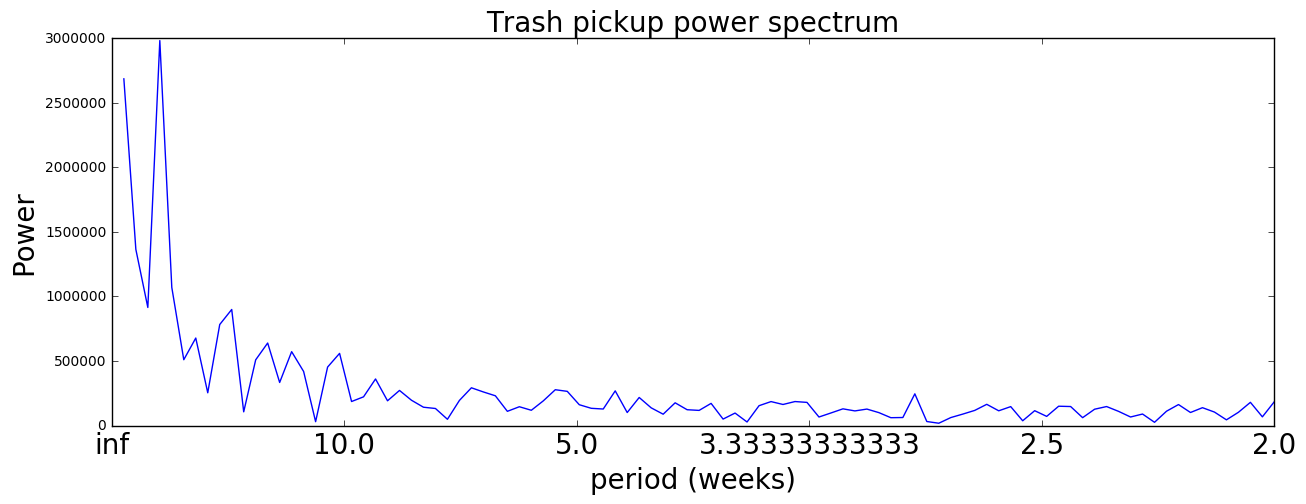

In [38]:
# plot power spectrum
N = 194
f = np.abs(np.fft.rfft(station[0]))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
#ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
#ax.set_xlim(0,1.0/15)
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)

In [39]:
# create for loop for fft analysis
fft = pd.DataFrame()
for i in range(600):
    f = np.abs(np.fft.rfft(station[i]))
    fft = pd.concat([fft, pd.DataFrame(f)], axis = 1)

In [40]:
fft

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2.315991e+07,4.008528e+06,1.405363e+06,3.689421e+06,3.952084e+06,4.320511e+06,2.688367e+06,2.501450e+06,2.196041e+06,3.709346e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.683790e+06,2.273999e+06,1.174249e+03,5.740136e+04,2.170433e+04,2.685071e+04,5.534585e+03,3.502181e+04,1.683406e+04,1.876990e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.363594e+06,3.018578e+05,6.240886e+04,2.719356e+05,1.591865e+05,1.779411e+05,9.963194e+04,1.552774e+05,9.128053e+04,1.591189e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.137938e+05,4.729266e+05,2.298053e+04,7.821764e+04,6.595431e+04,7.161981e+04,3.650901e+04,5.847054e+04,4.096601e+04,1.305791e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.980161e+06,5.177927e+05,2.475335e+04,8.838508e+04,5.245780e+04,7.106631e+04,2.744449e+04,6.208228e+04,4.106446e+04,3.085693e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.068934e+06,1.916689e+05,1.450850e+04,5.180516e+04,4.094519e+04,5.836793e+04,2.704766e+04,3.788818e+04,3.013291e+04,2.997912e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.092865e+05,4.548405e+05,1.336146e+04,2.341643e+04,2.102108e+04,3.906490e+04,1.896947e+04,1.508149e+04,1.478847e+04,5.916174e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.771162e+05,1.260934e+05,2.150727e+04,7.641740e+04,2.656329e+04,3.905800e+04,1.969284e+04,5.572140e+04,1.592333e+04,6.309787e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.532301e+05,2.695659e+05,3.603847e+03,9.197526e+03,1.743154e+04,1.246746e+04,8.123861e+03,1.459846e+04,1.342528e+04,1.460335e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7.818343e+05,1.234235e+05,8.873631e+03,2.240802e+04,1.819574e+04,1.468348e+04,6.868039e+03,1.600706e+04,7.406543e+03,1.219292e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


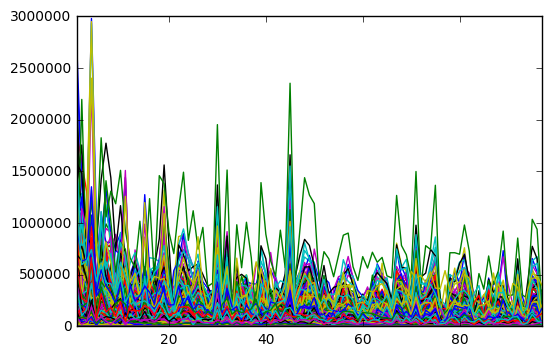

In [41]:
# plot initial fft 
fft.iloc[1:,:].plot(legend = False)


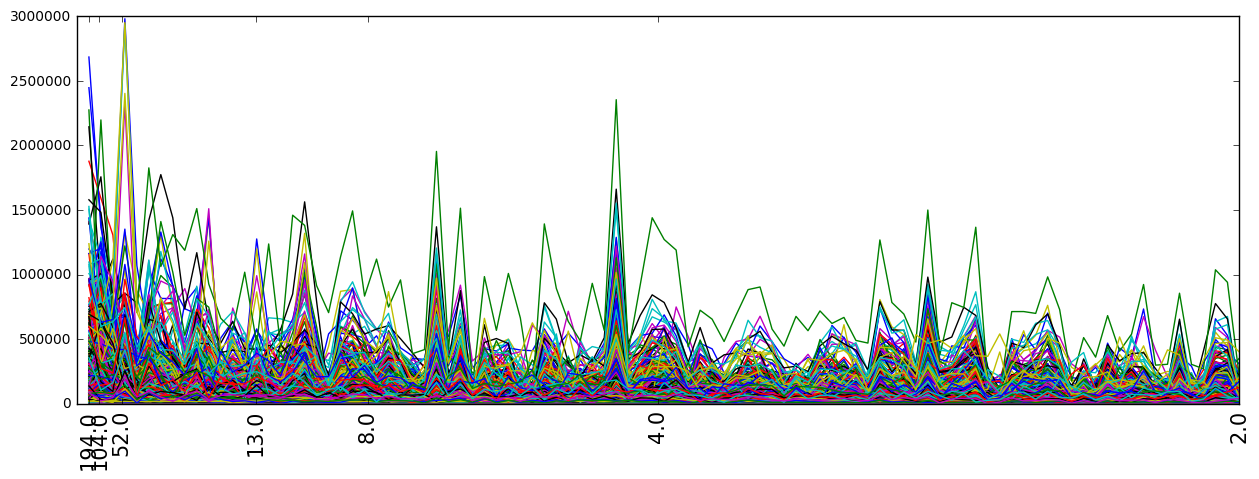

In [42]:
# plot fft with correct x tick labels
fig=plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
fft = pd.DataFrame()
for i in range(600):
    f = np.abs(np.fft.rfft(station[i]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f[1:]), '-')
    fft = pd.concat([fft,pd.DataFrame(f)],axis=1)
fft.columns = range(600)
ax.set_xticks([1./194,1./104,1./52,1./13,1./8,0.25,0.5])
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], rotation=90, fontsize=15)
plt.show()

#### Plot Caption:
This plot shows the periodicity of each station's ridership in weeks. There is a spike at the 52 week (1 year) mark.

In [44]:
# define max fft
max_fft = fft.iloc[1:,:].apply(max,axis=1)
print 'fft index contains the most power is:'
print max_fft.sort_values(ascending=False).head(1)

fft index contains the most power is:
4    2.980161e+06
dtype: float64


In [45]:
# find four stations with annual periodicity
four_stations = fft.ix[4].sort_values(ascending=False).head(4) #head 4 to get top 4
four_stations

0      2.980161e+06
194    2.950389e+06
150    2.931896e+06
327    2.402219e+06
Name: 4, dtype: float64

### Four stations with annual trends:
Station 0, 194, 150, and 327 show periodic trends every 52 weeks, or annual trends, according to this analysis.